In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy.optimize import minimize

file = '^NDX.csv'
csvreader = pd.read_csv(file)


In [15]:
num_days = 180
dates = csvreader.Date[ -num_days : ]
prices = csvreader.Close[ -num_days : ]


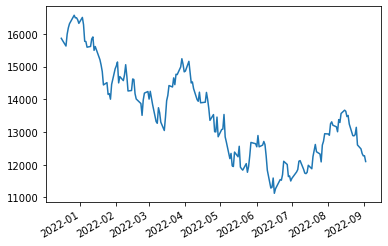

In [26]:

date_time = pd.to_datetime(dates)
data = prices
data = list(data)

DF = pd.DataFrame()
DF['value'] = data
DF = DF.set_index(date_time)
plt.plot(DF)
plt.gcf().autofmt_xdate()
plt.show()

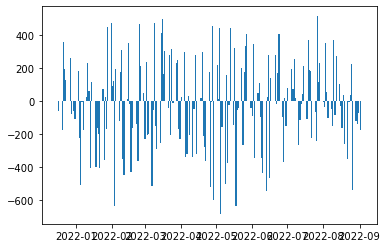

In [32]:
diff = list(np.diff(data))
diff.insert(0, 0)

x = date_time
y = diff

ax = plt.subplot(111)
ax.bar(x, y, width=1)
ax.xaxis_date()

plt.show()

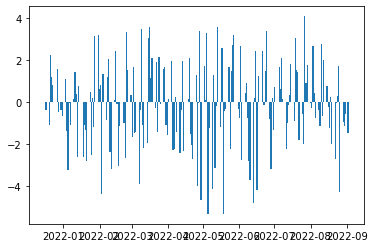

In [34]:
diff = list(np.diff(data))
diff.insert(0, 0)
percent_diff = [diff[i] / data[i] * 100 for i in range(len(data))]

x = date_time
y = percent_diff

ax = plt.subplot(111)
ax.bar(x, y, width=1)
ax.xaxis_date()
plt.show()

In [81]:
p = 1 - len(np.where(np.array(diff) > 0)[0].tolist()) / len(diff)
s = ((np.abs(np.mean(np.array(percent_diff)[np.where(np.array(diff) > 0)[0]])) + np.abs(np.mean(np.array(percent_diff)[np.where(np.array(diff) < 0)[0]]))) / 2) / 100
b = 1 + np.abs(np.mean(percent_diff) / s / 100)
print('p, q', p, q)
print('b', b)
print('s', s)
# print(np.mean(np.array(percent_diff)[np.where(np.array(diff) > 0)[0]]))
# print(np.mean(np.array(percent_diff)[np.where(np.array(diff) < 0)[0]]))


p, q 0.5333333333333333 0.4666666666666667
b 1.1046035889410726
s 0.016367215712625404


In [84]:
def StockKelly(p, b, s):
    '''
    Given daily change \s (ex: x = 0.03 => every day change +- 0.03 = +- 3 %)
    odds b (ex: dayly change is +-3%, but total average is 0.17%, then b = 0.17% / 3% )
    Win rate p: ex: total 100 days, win 63 days, then p = 63 / 100
    Then :
    leverage k  = (p - (1-p)/b) / s
    '''
    return (p - (1-p)/b) / s
print('p, b, s', p, b, s)

k = StockKelly(p, b, s)
print(k)

p, b, s 0.5333333333333333 1.1046035889410726 0.016367215712625404
6.773235001522848


In [100]:
def Backtesting(percent_diff, k, plot = False):
    money = 1
    for i in range(len(percent_diff)):
        if plot == True:
            print(f'day {i}, percent_diff: {percent_diff[i]}, money: {money}')
        money += k * money * - percent_diff[i] / 100
        if money < 0:
            money = 0
    return money
Backtesting(percent_diff, k,  plot = True)

day 0, percent_diff: 0.0, money: 1
day 1, percent_diff: -0.39540946946807304, money: 1.0
day 2, percent_diff: -1.1122621004525493, money: 1.0267820125853473
day 3, percent_diff: 2.2434276071446426, money: 1.1041357915537646
day 4, percent_diff: 1.1981316553344001, money: 0.9363594608621378
day 5, percent_diff: 0.7853118969296558, money: 0.8603717626019941
day 6, percent_diff: 1.5650522951561763, money: 0.8146077107342866
day 7, percent_diff: -0.47814584844426855, money: 0.7282554893025447
day 8, percent_diff: 0.01424782371326796, money: 0.7518407293149029
day 9, percent_diff: -0.3768323187113889, money: 0.7511151740030669
day 10, percent_diff: -0.6680085543634176, money: 0.7702864412937196
day 11, percent_diff: 1.1010301207920854, money: 0.8051386592534469
day 12, percent_diff: -1.3638988828642482, money: 0.7450951558874147
day 13, percent_diff: -3.220626886804713, money: 0.813927103402633
day 14, percent_diff: -0.040721688922170304, money: 0.9914776725314631
day 15, percent_diff: -1.1

1.4980001383778823

In [103]:
def BTK(k):
    return  - Backtesting(percent_diff, k)
res = minimize(BTK, [7], method='nelder-mead')
print(res.x)

[4.20965576]


In [110]:
Backtesting(percent_diff, 5,  plot = True)

day 0, percent_diff: 0.0, money: 1
day 1, percent_diff: -0.39540946946807304, money: 1.0
day 2, percent_diff: -1.1122621004525493, money: 1.0197704734734037
day 3, percent_diff: 2.2434276071446426, money: 1.0764830759136546
day 4, percent_diff: 1.1981316553344001, money: 0.9557324833572208
day 5, percent_diff: 0.7853118969296558, money: 0.8984778162401387
day 6, percent_diff: 1.5650522951561763, money: 0.8631985503291008
day 7, percent_diff: -0.47814584844426855, money: 0.7956510067106985
day 8, percent_diff: 0.01424782371326796, money: 0.8146728679941597
day 9, percent_diff: -0.3768323187113889, money: 0.8140925022238016
day 10, percent_diff: -0.6680085543634176, money: 0.8294313204867292
day 11, percent_diff: 1.1010301207920854, money: 0.8571346813538332
day 12, percent_diff: -1.3638988828642482, money: 0.8099481262665283
day 13, percent_diff: -3.220626886804713, money: 0.8651824934961738
day 14, percent_diff: -0.040721688922170304, money: 1.0045039935234998
day 15, percent_diff: -1.

1.8645272953357332

In [111]:
Backtesting(percent_diff, 5,  plot = True)

day 0, percent_diff: 0.0, money: 1
day 1, percent_diff: -0.39540946946807304, money: 1.0
day 2, percent_diff: -1.1122621004525493, money: 1.0197704734734037
day 3, percent_diff: 2.2434276071446426, money: 1.0764830759136546
day 4, percent_diff: 1.1981316553344001, money: 0.9557324833572208
day 5, percent_diff: 0.7853118969296558, money: 0.8984778162401387
day 6, percent_diff: 1.5650522951561763, money: 0.8631985503291008
day 7, percent_diff: -0.47814584844426855, money: 0.7956510067106985
day 8, percent_diff: 0.01424782371326796, money: 0.8146728679941597
day 9, percent_diff: -0.3768323187113889, money: 0.8140925022238016
day 10, percent_diff: -0.6680085543634176, money: 0.8294313204867292
day 11, percent_diff: 1.1010301207920854, money: 0.8571346813538332
day 12, percent_diff: -1.3638988828642482, money: 0.8099481262665283
day 13, percent_diff: -3.220626886804713, money: 0.8651824934961738
day 14, percent_diff: -0.040721688922170304, money: 1.0045039935234998
day 15, percent_diff: -1.

1.8645272953357332